In [40]:
import numpy as np
import matplotlib.markers as mmarkers
import matplotlib.image as image
#import statsbomb as sb
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from mplsoccer.pitch import Pitch, VerticalPitch

# Import libraries that we use
from pathlib import Path
import pandas as pd
import json
from tqdm import tqdm
#passes = event_df[(event_df['event'] == 'pass') & (event_df['half_time'] == 1)]


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import os



import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from highlight_text import ax_text
from mplsoccer import VerticalPitch, FontManager, Sbopen, add_image
from adjustText import adjust_text
from PIL import Image

In [41]:
event_df = pd.read_csv('data/wyscout_events.csv')
shots= event_df[(event_df['type.primary'] == 'shot')]
mar_shots=shots[(shots['team.id']== 16216)]
shots__ = mar_shots[['shot.xg']].dropna(axis=0)
#xG= shots[(shots['shot.xg']!= 0.)]
# print(shots)
print(shots__)
#print(xG)

       shot.xg
362   0.012000
510   0.123100
639   0.054070
936   0.053780
1068  0.024710
1162  0.033350
1300  0.003424
1357  0.444800
1654  0.086100
1677  0.196900


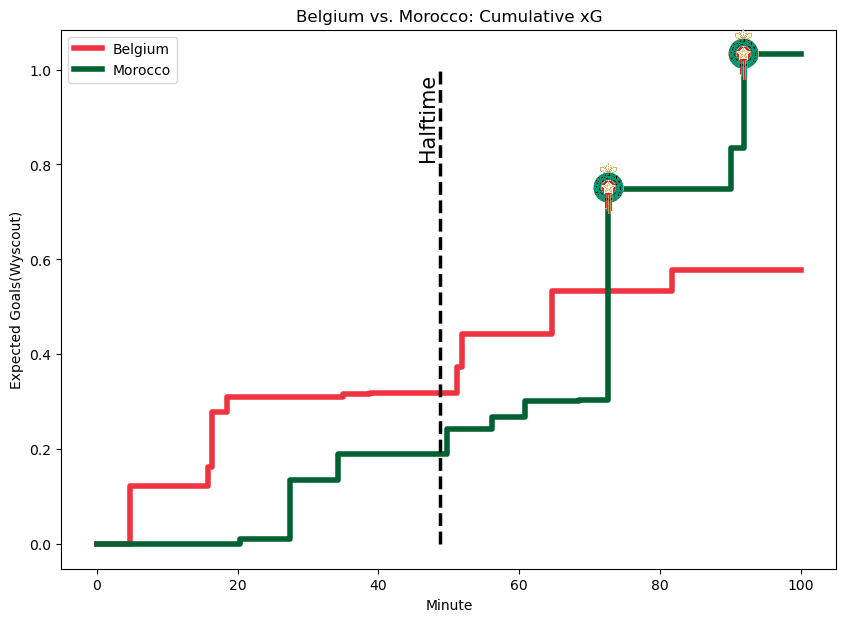

In [81]:
#WYSCOUT

def calc_xG(xG_events):
    i = 0
    xG = np.zeros(len(xG_events) + 1)
    while i < len(xG_events):
        s = sum(xG_events[:i])
        xG[i] = s + xG_events[i]
        i += 1
    xG[-1] = sum(xG_events)
    return np.append(0, xG)

def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


# TODO: Change the Team Names
team1 = "Belgium"
team2 = "Morocco"

# TODO: Change File Path and Put desired image in corresponding directory
image_path = os.getcwd() + '/wappen/morocco.png'

# Read the data from wyscout Dataframe: Change Path if necessary
df_wyscout = pd.read_csv('data/wyscout_events.csv')
xG_tot = df_wyscout[['minute', 'second', 'team.name', 'shot.isGoal', 'shot.xg']].dropna(axis=0)
xG_1 = xG_tot[xG_tot['team.name'] == team1].reset_index()
xG_2 = xG_tot[xG_tot['team.name'] == team2].reset_index()

## Get Time in Minutes
t1 = xG_1['minute'] + xG_1['second']/60
t2 = xG_2['minute'] + xG_2['second']/60
t1 = np.append(0, t1);
t1 = np.append(t1, 100)
t2 = np.append(0, t2);
t2 = np.append(t2, 100)

## Get accumulated xGs
xG_ac1 = calc_xG(xG_1['shot.xg'].to_numpy())
xG_ac2 = calc_xG(xG_2['shot.xg'].to_numpy())

## Get Goals
goals1 = xG_1[xG_1['shot.isGoal'] == True]
t_goals1 = goals1['minute'] + goals1['second']/60
xG_goals1 = xG_ac1[t_goals1.index + 1]

goals2 = xG_2[xG_2['shot.isGoal'] == True]
t_goals2 = goals2['minute'] + goals2['second']/60
xG_goals2 = xG_ac2[t_goals2.index + 1]

#Halftime line
ht_1=df_wyscout[(df_wyscout["matchPeriod"]=="1H")]
ht_1= ht_1[["matchPeriod", "minute", "second"]].dropna()
ht_t=48 + 42/60
ht_line_t=np.full(2,ht_t)
ht_line_y= np.array([0,1])


ht_text_x= 47
ht_text_y=0.9



#--------





# Draw Figure
image_path1 = get_sample_data(image_path)
image_path2 = get_sample_data(image_path)
fig, ax = plt.subplots(figsize =(10, 7))
#plt.style.use('dark_background')
        # fig.patch.set_facecolor('#EFE9E6')
        # ax.set_facecolor('#EFE9E6')
plt.step(t1, xG_ac1, where='post', color='#EF3340', label=team1, linewidth='4')
plt.step(t2, xG_ac2, where='post', color='#006233', label=team2, linewidth='4')
imscatter(t_goals1, xG_goals1, image_path1, zoom=0.08, ax=ax)
imscatter(t_goals2, xG_goals2, image_path2, zoom=0.08, ax=ax)
ax.plot(t_goals1, xG_goals1, '.')
ax.plot(t_goals2, xG_goals2, '.')
ax.plot( ht_line_t, ht_line_y, linewidth=2.5 , linestyle="--", color='black')
ax.text(ht_text_x, ht_text_y, "Halftime",ha="center", va="center", rotation=90, size=15,color='black')
plt.xlabel('Minute'); plt.ylabel('Expected Goals(Wyscout)')
plt.title('Belgium vs. Morocco: Cumulative xG')
plt.legend()
plt.savefig('cumulative_xG_wyscout.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


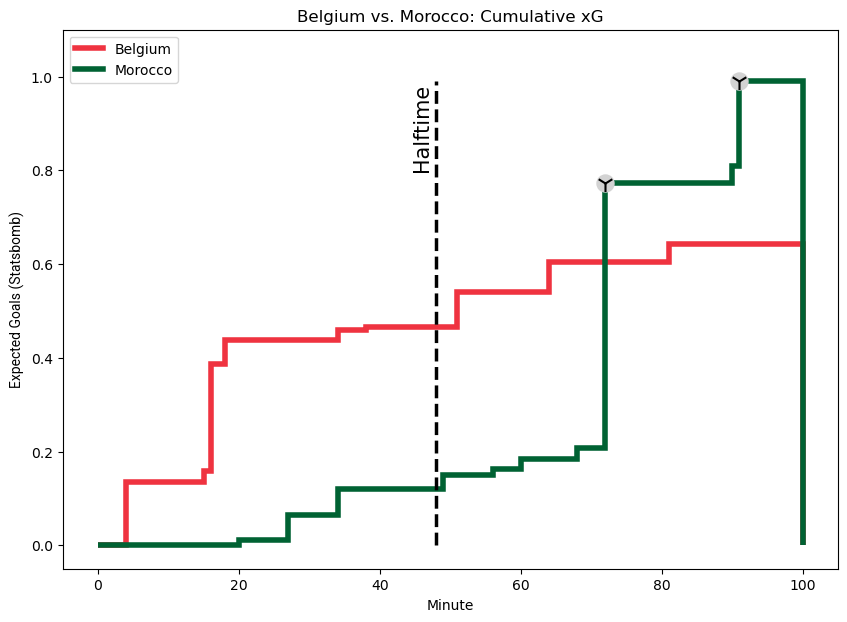

In [82]:
#STATSBOMB


#BEL : MOR = 3857283
robotto_regular = FontManager()
parser = Sbopen()
#Change here your match ID in Statsbomb and the team names 
df_event, df_related, df_freeze, df_tactics = parser.event(3857283)
team1="Belgium"
team2='Morocco'
# lineup data
df_shot_sb=df_event[df_event['type_name']=='Shot']
df_goal_team1=df_shot_sb[(df_shot_sb['outcome_name']=='Goal') & (df_shot_sb['team_name']==team1)]
df_goal_team2=df_shot_sb[(df_shot_sb['outcome_name']=='Goal') & (df_shot_sb['team_name']==team2)]

xg_team1=np.zeros(100)
xg_team2=np.zeros(100)
for i in range(100):
    xg_team1[i]=np.sum(df_shot_sb[(df_shot_sb['team_name']==team1) & (df_shot_sb['minute']<=i)].shot_statsbomb_xg.values[0:i])
    xg_team2[i]=np.sum(df_shot_sb[(df_shot_sb['team_name']==team2) & (df_shot_sb['minute']<=i)].shot_statsbomb_xg.values[0:i])

h, edges = np.histogram(xg_team1, bins=np.linspace(0,1,100))

fig, axs = plt.subplots(1, 1, figsize=(10, 7))

axs.stairs(xg_team1, label=team1, color='#EF3340',linewidth = '4')
x1=df_goal_team1['minute'].values
y1=xg_team1[df_goal_team1['minute'].values]
axs.scatter(x1,y1, s=150, marker="o", color='lightgrey')
axs.scatter(x1,y1, s=150, marker="1", color='black')

x2=df_goal_team2['minute'].values
y2=xg_team2[df_goal_team2['minute'].values]
axs.stairs(xg_team2, label=team2, color='#006233',linewidth = '4')
axs.scatter(x2,y2, s=150, marker="o",color='lightgrey')
# imscatter(x2,y2, s=150, image_path, zoom=0.08, ax=ax)
axs.scatter(x2,y2, s=150, marker="1",color='black')

axs.set_title(team1+" vs. " +team2+": Cumulative xG") #, fontproperties=robotto_regular.prop
axs.legend(loc='upper left')
axs.set_xlabel('Minute')# fontproperties=robotto_regular.prop
axs.set_ylabel('Expected Goals (Statsbomb)', fontproperties=robotto_regular.prop,)
    
#fig.patch.set_facecolor('#EFE9E6')
ax.set_facecolor('#EFE9E6')

plt.plot([df_event[df_event['period']==1].minute.values[-1], df_event[df_event['period']==1].minute.values[-1]],
             [0, max(max(xg_team1), max(xg_team2))], color='black', linewidth=2.5, linestyle="--")

plt.ylim(-0.05,1.1)            
    
    #axs.text(r'Halftime',xy=(df_event[df_event['period']==1].minute.values[-1], rotation=30, np.sin(45)), xycoords='data', fontproperties=robotto_regular.prop,)
    
t = axs.text(df_event[df_event['period']==1].minute.values[-1]-2, max(max(xg_team1), max(xg_team2))-0.1, "Halftime",
            ha="center", va="center", rotation=90, size=15,color='black')
plt.savefig('cumulative_xG_Statsbomb.png', dpi=300, bbox_inches='tight', pad_inches=0)

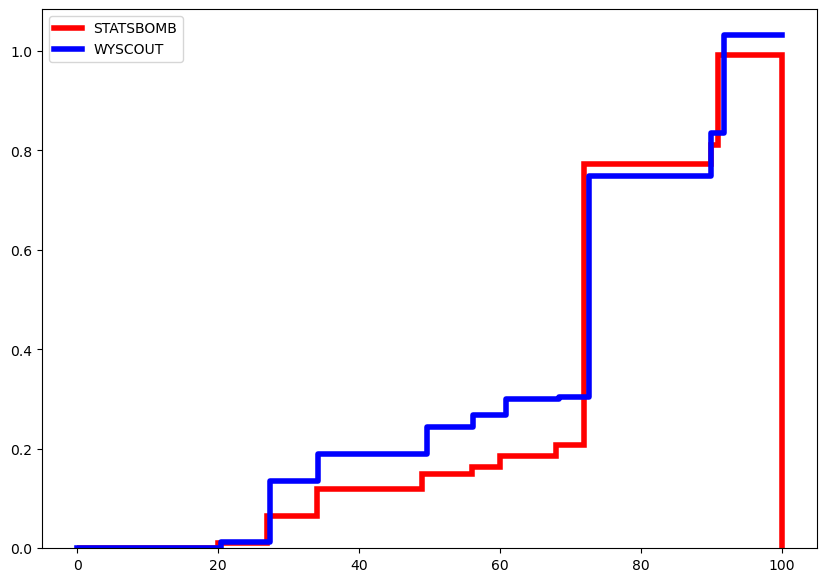

In [89]:


plt.style.use("default")
fig, axs = plt.subplots(1, 1, figsize=(10, 7))
axs.stairs(xg_team2, label="STATSBOMB", color='r',linewidth = '4')
axs.step(t2, xG_ac2, where='post', color='blue', linewidth='4', label="WYSCOUT")

plt.legend()
plt.show()

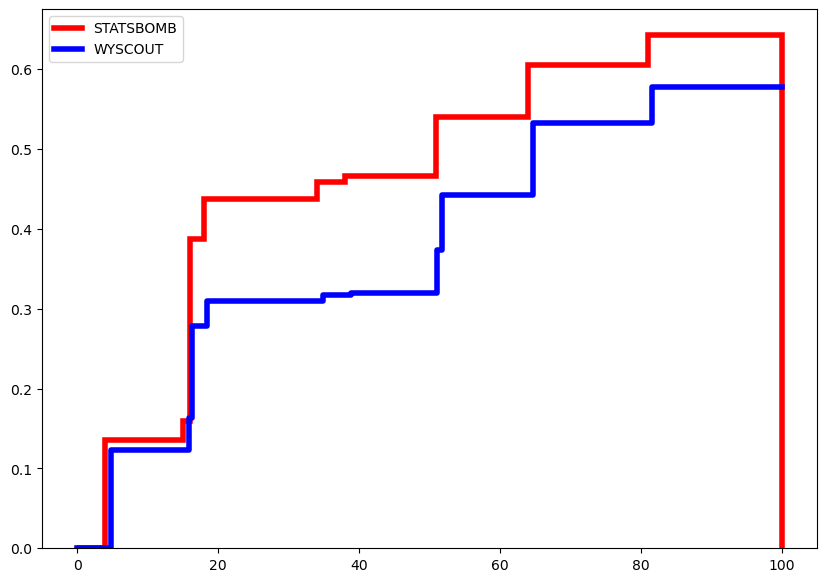

In [78]:
fig, axs = plt.subplots(1, 1, figsize=(10, 7))
axs.stairs(xg_team1, label="STATSBOMB", color='r',linewidth = '4')
axs.step(t1, xG_ac1, where='post', color='blue', label="WYSCOUT", linewidth='4')
plt.legend(loc="upper left")
plt.show()



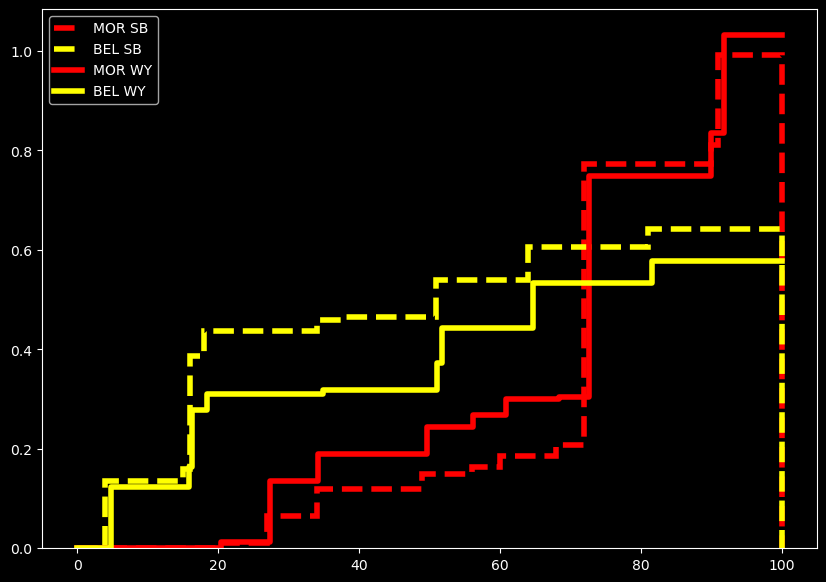

In [102]:
plt.style.use("dark_background")
fig, axs = plt.subplots(1, 1, figsize=(10, 7))
axs.stairs(xg_team2, label="MOR SB", color='r',linewidth = '4', linestyle= "--")
axs.stairs(xg_team1, label="BEL SB", color='yellow',linewidth = '4', linestyle="--")
axs.step(t2, xG_ac2, where='post', color='r', linewidth='4', label="MOR WY")
axs.step(t1, xG_ac1, where='post', color='yellow', label="BEL WY", linewidth='4')
plt.legend()
plt.show()

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt



# def number_to_filename(Game, Wyscout_Nr):
#     return str(Game) + "_" +str(Wyscout_Nr) + "_" "events.json"

# def wyscout_json_to_df(file_name, Game):
#     with open(base_path + '/' + str(Game) + '/' + file_name, encoding='utf8') as f:
#         js = json.load(f)
#         df = pd.json_normalize(js['events'])
#     return df

#shots of a team, including of and on target as well as penalty
def shots(df, Team_ID):
    df_shots = df[((df['type.primary'] == 'shot') | (df['type.primary']=='penalty')) &
                  (df['team.id'] == Team_ID)]
    return df_shots

def xG_Wyscout_distribution(df, Team_ID1, Team_ID2):
    goals = df[(df['shot.isGoal'] == True)]
    goals = goals[('shot.xg')].tolist()

    #filter for shots, team name and goals by team and store in list
    df1 = shots(df, Team_ID1)
    xg1 = df1[("shot.xg")].tolist()
    name1 = df1["team.name"].tolist()[0]

    #filter for shots, team name and goals by team and store in list
    df2 = shots(df, Team_ID2)
    xg2 = df2[("shot.xg")].tolist()
    name2 = df2["team.name"].tolist()[0]

    # Create the figure and axis objects
    fig, ax = plt.subplots()

    # Define the line coordinates
    x = [0, 1]
    y = [0, 0]

    # Plot the line (not necessary if the x-coordinate is used as line)
    ax.plot(x, y, linewidth=2)

    # Add arrows at the specified x-coordinates
    for i in range(len(xg1)):
        ax.arrow(xg1[i], 0.065, 0, -0.05, length_includes_head=True, head_width=0.005, color='blue')
    for i in range(len(xg2)):
        ax.arrow(xg2[i], -0.065, 0, 0.05, length_includes_head=True, head_width=0.005, color='red')

    #text for goals, is currently always below axis- needs to be changed 
    # if one wants to have it always on the right side
    for i in range(len(goals)):
        ax.text(goals[i] - 0.01, -0.075, "goal", fontdict=None, fontsize=10)

    # Set the axis limits and names of teams, as well as disable visibility of non x- axis  
    ax.text(0.7, 0.02, name1, fontdict=None, fontsize=20)
    ax.text(0.7, -0.03, name2, fontdict=None, fontsize=20)
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.12, 0.12)
    ax.set_xlabel('xG-value')
    plt.xticks(np.arange(0, 1.1, 0.1))
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.yticks([], [])
    
    # Show the plot
    plt.show()

#for this code to run the wyscout event.json needs to be in a folder called [Game-Nr], which 
# itself is in the 'Games' folder. 
base_path = 'Games'
Game = 60
Wyscout_Nr = 5340760
df = wyscout_json_to_df(number_to_filename(Game, Wyscout_Nr), Game)

xG_Wyscout_distribution(df, 9905, 16216)


NameError: name 'wyscout_json_to_df' is not defined